In [1]:
import pandas as pd

In [5]:
df = pd.read_excel("data/TRACT_ZIP_122020.xlsx")

In [7]:
df.head()

TRACT    ZIP  RES_RATIO  BUS_RATIO  OTH_RATIO  TOT_RATIO
0  1001020100  36067   1.000000   1.000000   1.000000   1.000000
1  1001020200  36067   1.000000   1.000000   1.000000   1.000000
2  1001020300  36067   1.000000   1.000000   1.000000   1.000000
3  1001020400  36066   0.979601   0.488506   0.945205   0.943742
4  1001020400  36067   0.020399   0.511494   0.054795   0.056258

In [8]:
crosswalk = pd.read_csv("data/fips_crosswalk_merged.csv")

In [9]:
crosswalk.head()

FIPS STATE_ABBR  STATE_FIPS  COUNTY_FIPS  STCOFIPS  TRACT_FIPS  \
0  6001400100         CA           6            1      6001      400100   
1  6001400200         CA           6            1      6001      400200   
2  6001400300         CA           6            1      6001      400300   
3  6001400400         CA           6            1      6001      400400   
4  6001400500         CA           6            1      6001      400500   

   POPULATION_2020  POP20_SQMI  SQMI  FIPS.1  
0             3038      1133.6  2.68  1765.0  
1             2001      8700.0  0.23  1766.0  
2             5504     12800.0  0.43  1767.0  
3             4112     14685.7  0.28  1768.0  
4             3644     15843.5  0.23  1769.0

In [12]:
len(crosswalk)

9096

In [13]:
df_ = df.merge(
    crosswalk, 
    left_on='TRACT',
    right_on='FIPS',
    how="inner",
)

In [14]:
len(df_)

12062

In [15]:
df_.head()

TRACT    ZIP  RES_RATIO  BUS_RATIO  OTH_RATIO  TOT_RATIO        FIPS  \
0  6001400100  94720   0.000000   0.958974   0.934783   0.158721  6001400100   
1  6001400100  94704   0.040474   0.000000   0.000000   0.033721  6001400100   
2  6001400100  94563   0.000698   0.000000   0.000000   0.000581  6001400100   
3  6001400100  94618   0.267271   0.025641   0.000000   0.225581  6001400100   
4  6001400100  94611   0.041172   0.000000   0.021739   0.035465  6001400100   

  STATE_ABBR  STATE_FIPS  COUNTY_FIPS  STCOFIPS  TRACT_FIPS  POPULATION_2020  \
0         CA           6            1      6001      400100             3038   
1         CA           6            1      6001      400100             3038   
2         CA           6            1      6001      400100             3038   
3         CA           6            1      6001      400100             3038   
4         CA           6            1      6001      400100             3038   

   POP20_SQMI  SQMI  FIPS.1  
0      1133.6  2.68  1765.0  
1      1133.6  2.68  1765.0  
2      1133.6  2.68  1765.0  
3      1133.6  2.68  1765.0  
4      1133.6  2.68  1765.0

In [28]:
zips = df_.ZIP.astype(str).unique()

In [29]:
zips

array(['94720', '94704', '94563', ..., '95961', '95977', '95903'],
      dtype=object)

In [16]:
import matplotlib.pyplot as plt 

In [17]:
import geopandas as gpd

In [33]:
states = gpd.read_file('data/shapefiles/tl_2020_us_zcta520/tl_2020_us_zcta520.shp')

<Axes: >

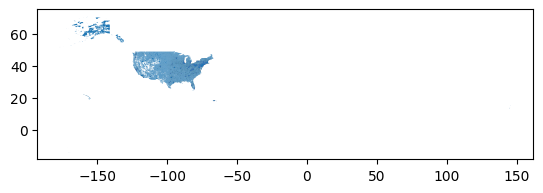

In [19]:
states.plot()

In [34]:
bad_zips = states.ZCTA5CE20.unique()

In [35]:
len(bad_zips)

33791

In [38]:
bad_zips = set(bad_zips)-set(zips)

In [39]:
for z in bad_zips:
    states = states[states.ZCTA5CE20 != z]

<Axes: >

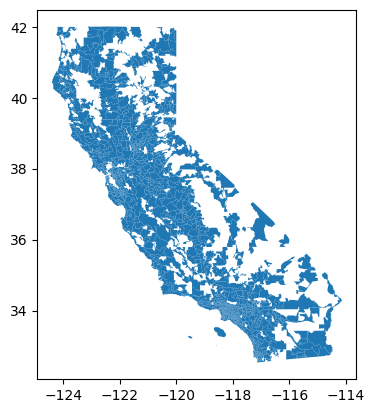

In [40]:
states.plot()

In [88]:
df = pd.read_parquet("outputs/hotspots_per_fips.parquet")

In [89]:
df = df[['ws', 'hw', 'hp', 'hwp', 'hws', 'hwps']]

In [90]:
df = df.reset_index()

In [91]:
df = df.groupby("FIPS").sum()

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_36942/2634534081.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby("FIPS").sum()


In [92]:
df = df.reset_index()

In [93]:
df.head()

FIPS  ws  hw  hp  hwp  hws  hwps
0  1765.0   0   0   8    0    0   759
1  1766.0   0   0   8    0    0   752
2  1767.0   0   0   8    0    0   752
3  1768.0   0   0   8    0    0   747
4  1769.0   0   0   8    0    0   754

In [94]:
df = df.merge(df_, left_on="FIPS", right_on="FIPS.1")

In [95]:
df.head()

FIPS_x  ws  hw  hp  hwp  hws  hwps       TRACT    ZIP  RES_RATIO  ...  \
0  1765.0   0   0   8    0    0   759  6001400100  94720   0.000000  ...   
1  1765.0   0   0   8    0    0   759  6001400100  94704   0.040474  ...   
2  1765.0   0   0   8    0    0   759  6001400100  94563   0.000698  ...   
3  1765.0   0   0   8    0    0   759  6001400100  94618   0.267271  ...   
4  1765.0   0   0   8    0    0   759  6001400100  94611   0.041172  ...   

       FIPS_y  STATE_ABBR  STATE_FIPS  COUNTY_FIPS STCOFIPS  TRACT_FIPS  \
0  6001400100          CA           6            1     6001      400100   
1  6001400100          CA           6            1     6001      400100   
2  6001400100          CA           6            1     6001      400100   
3  6001400100          CA           6            1     6001      400100   
4  6001400100          CA           6            1     6001      400100   

   POPULATION_2020  POP20_SQMI  SQMI  FIPS.1  
0             3038      1133.6  2.68  1765.0  
1             3038      1133.6  2.68  1765.0  
2             3038      1133.6  2.68  1765.0  
3             3038      1133.6  2.68  1765.0  
4             3038      1133.6  2.68  1765.0  

[5 rows x 23 columns]

In [99]:
df = df[['ws', 'hw', 'hp', 'hwp', 'hws', 'hwps', 'ZIP']]

In [100]:
df = df.groupby("ZIP").max()

In [103]:
df = df.reset_index()

In [104]:
df.ZIP = df.ZIP.astype(str)

In [107]:
df = df.merge(states, left_on="ZIP", right_on="ZCTA5CE20")
df = df.set_geometry(df.geometry)

In [113]:
import plotting
hss = plotting.get_hotspopt_dict()

In [127]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx 

In [215]:
def statePlot(data, title, cmap, zoom, dpi):
    f,ax = plt.subplots(1,1, figsize=(8,8), 
    sharex=True,sharey=True, dpi=dpi)
    f.tight_layout(pad=0.8)
    ax.set_axis_off()
    plt.title(title,fontsize='large')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.2)
    ux = df.to_crs(epsg=3857).plot(data, ax=ax, 
    edgecolor='k',    cmap=cmap, alpha = 1, linewidth=0.1,
    legend=True, cax=cax)
    #ctx.add_basemap(ux,    zoom=zoom,
    # source=ctx.providers.Stamen.TonerLite);
    plt.ylabel('Million square miles', fontsize=12)
    # Use savefig to save your map
    plt.savefig(
    'figures/zip_agg_hotspots_' + data +'.png')
    plt.show()

In [152]:
len(df)

1667

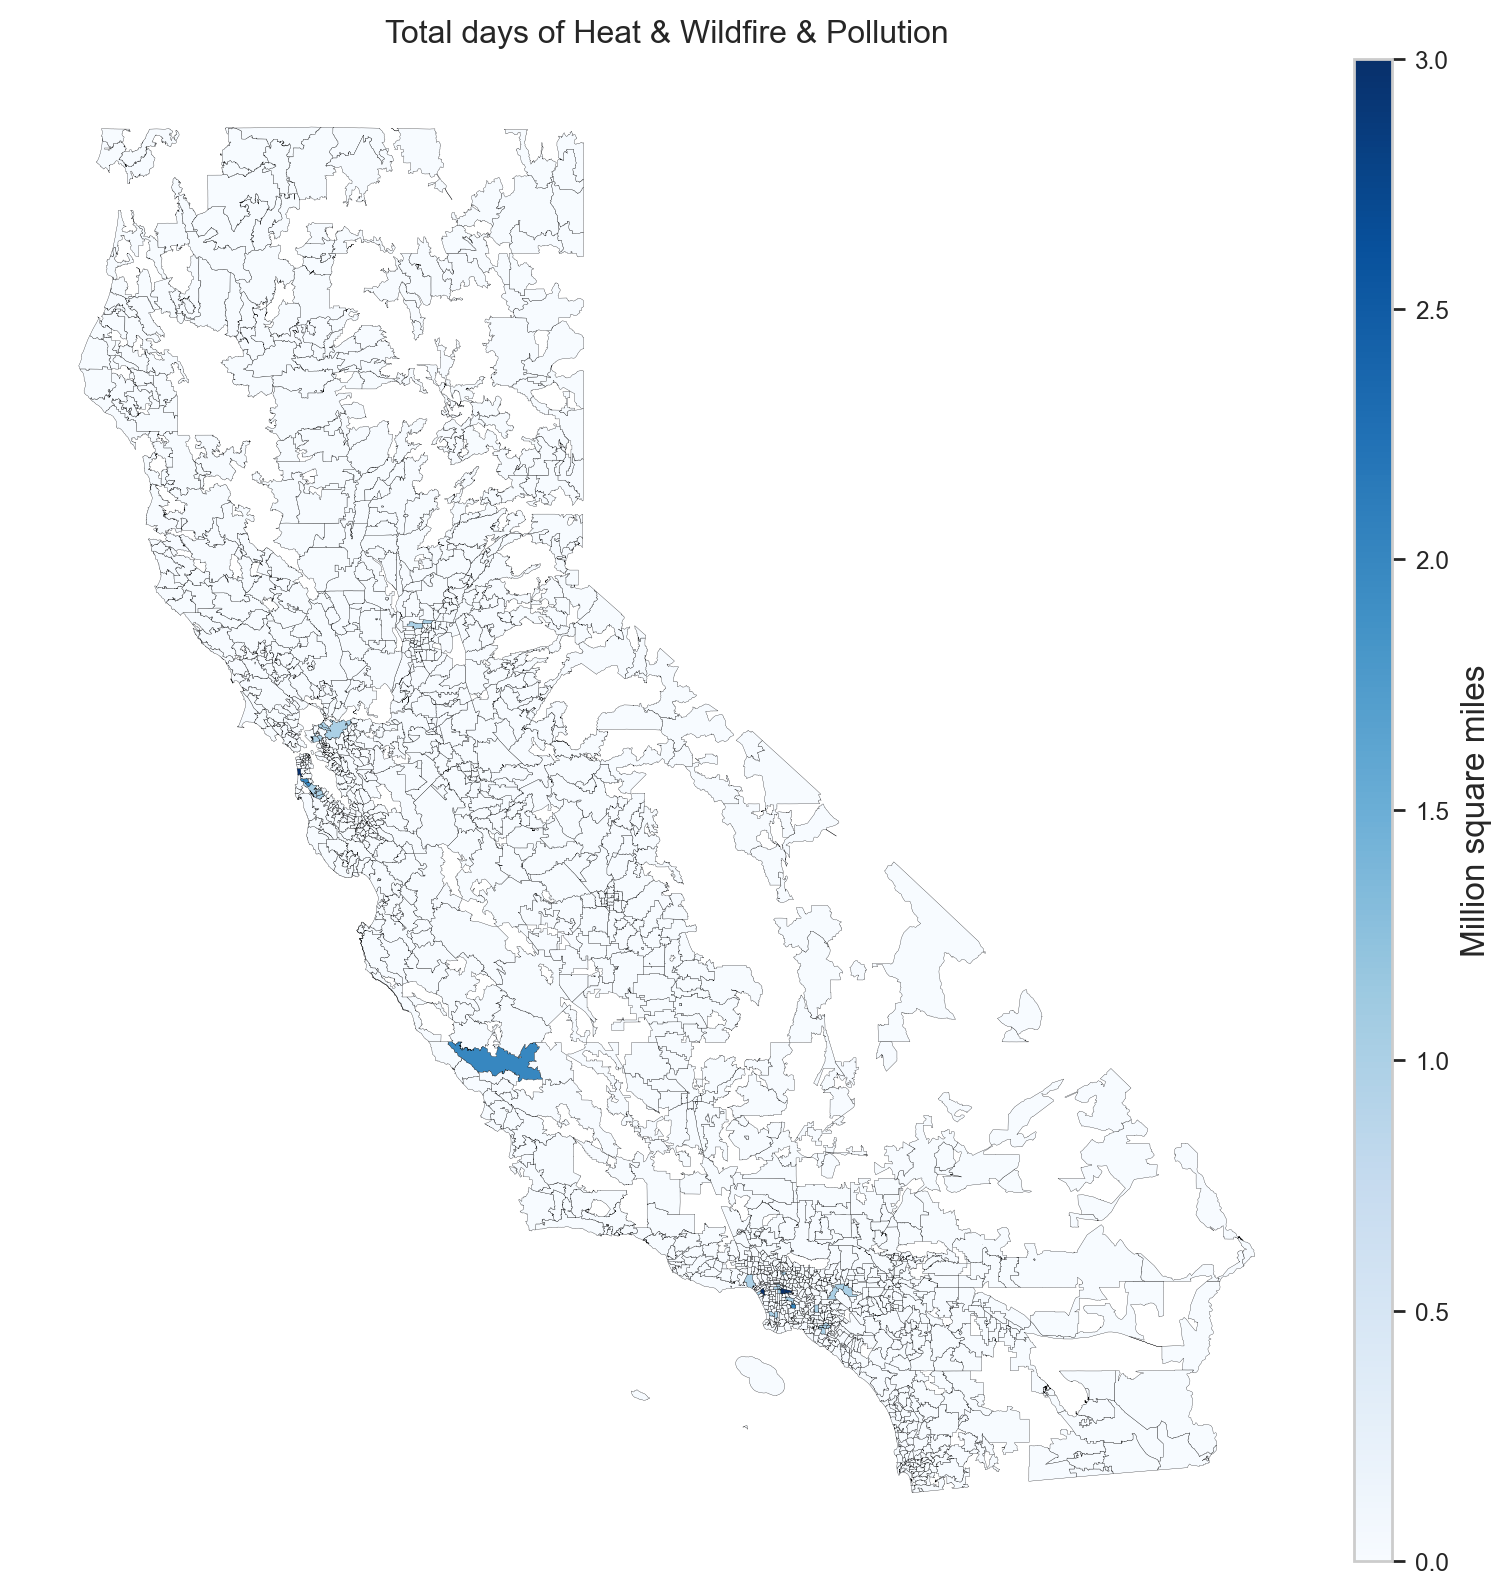

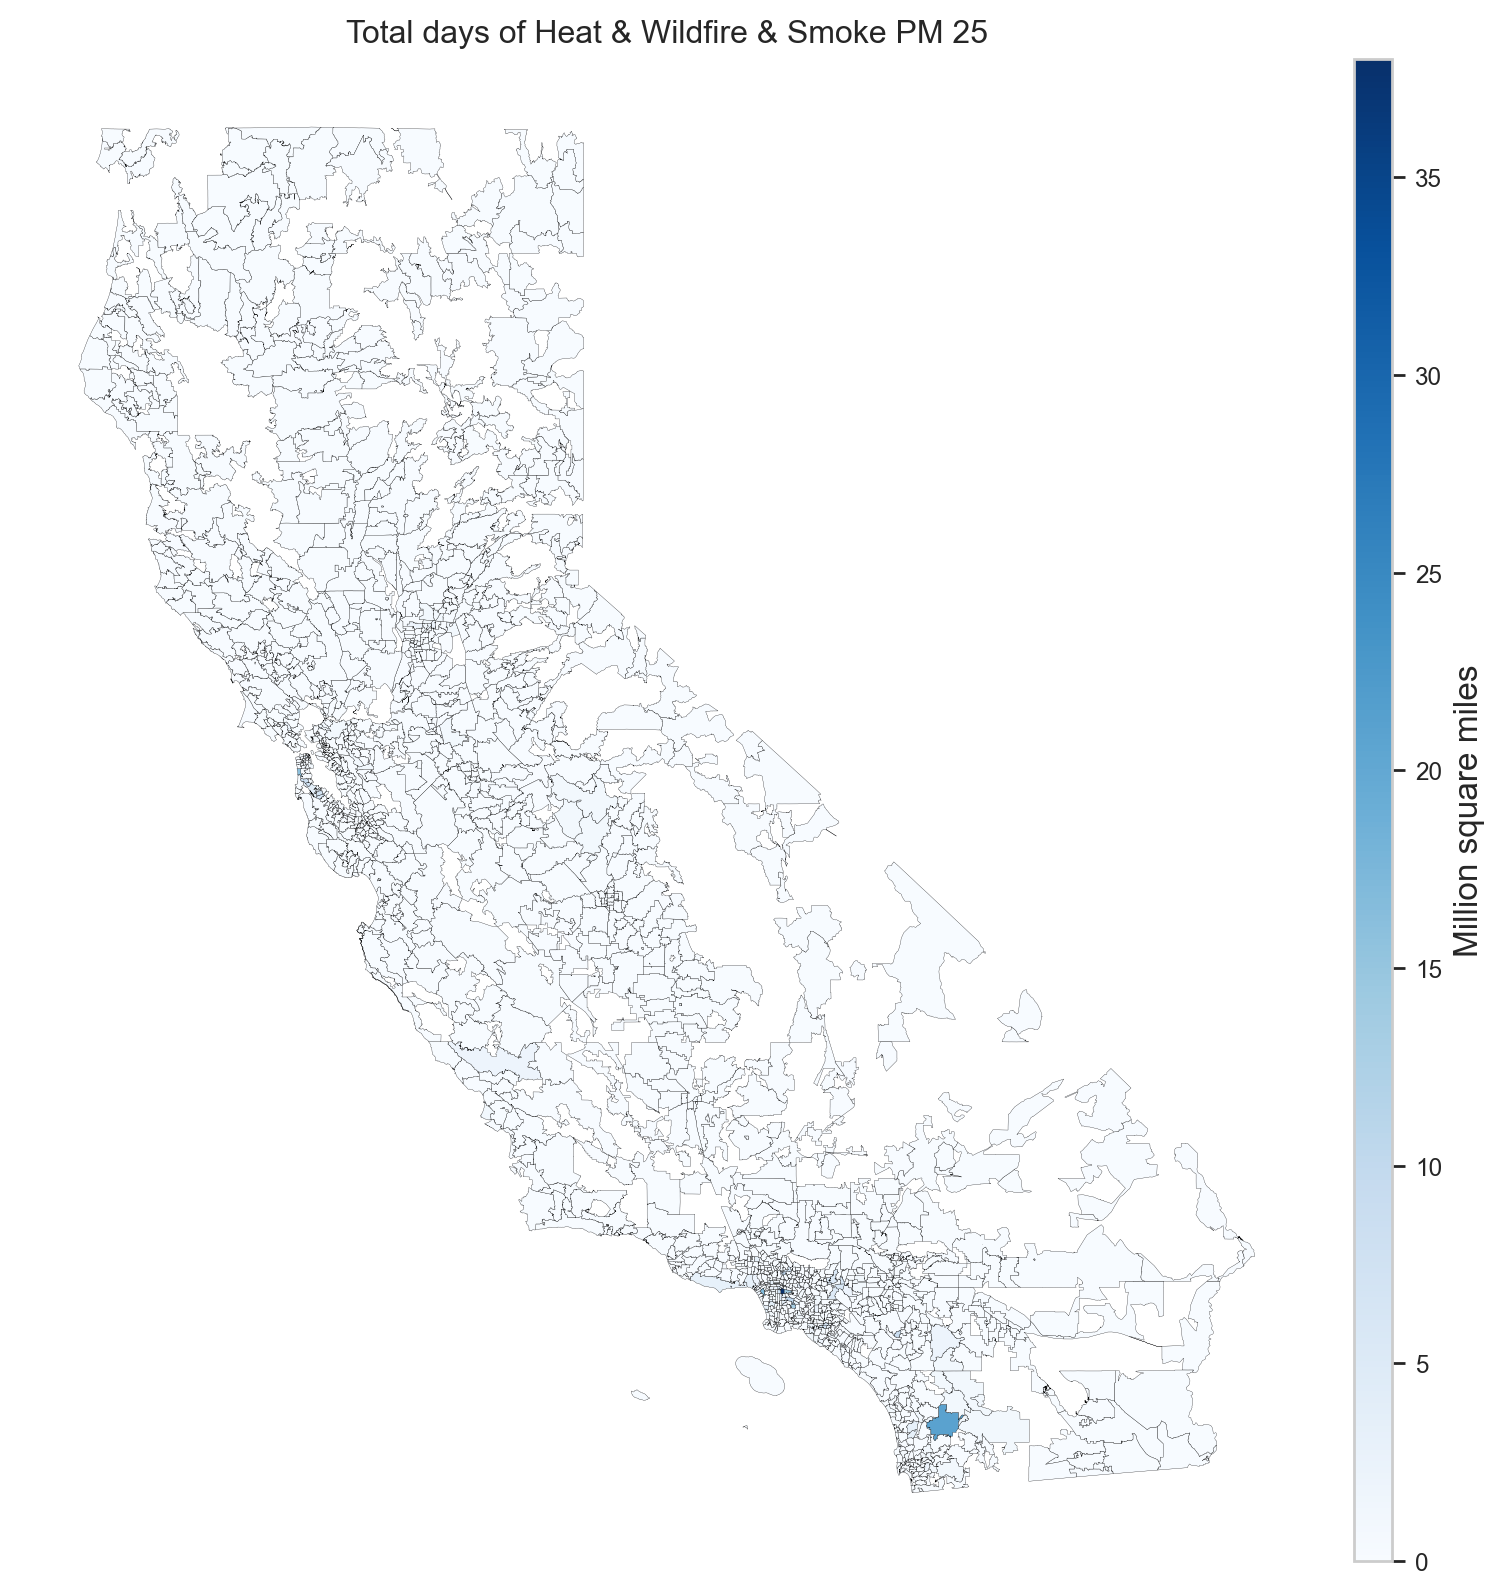

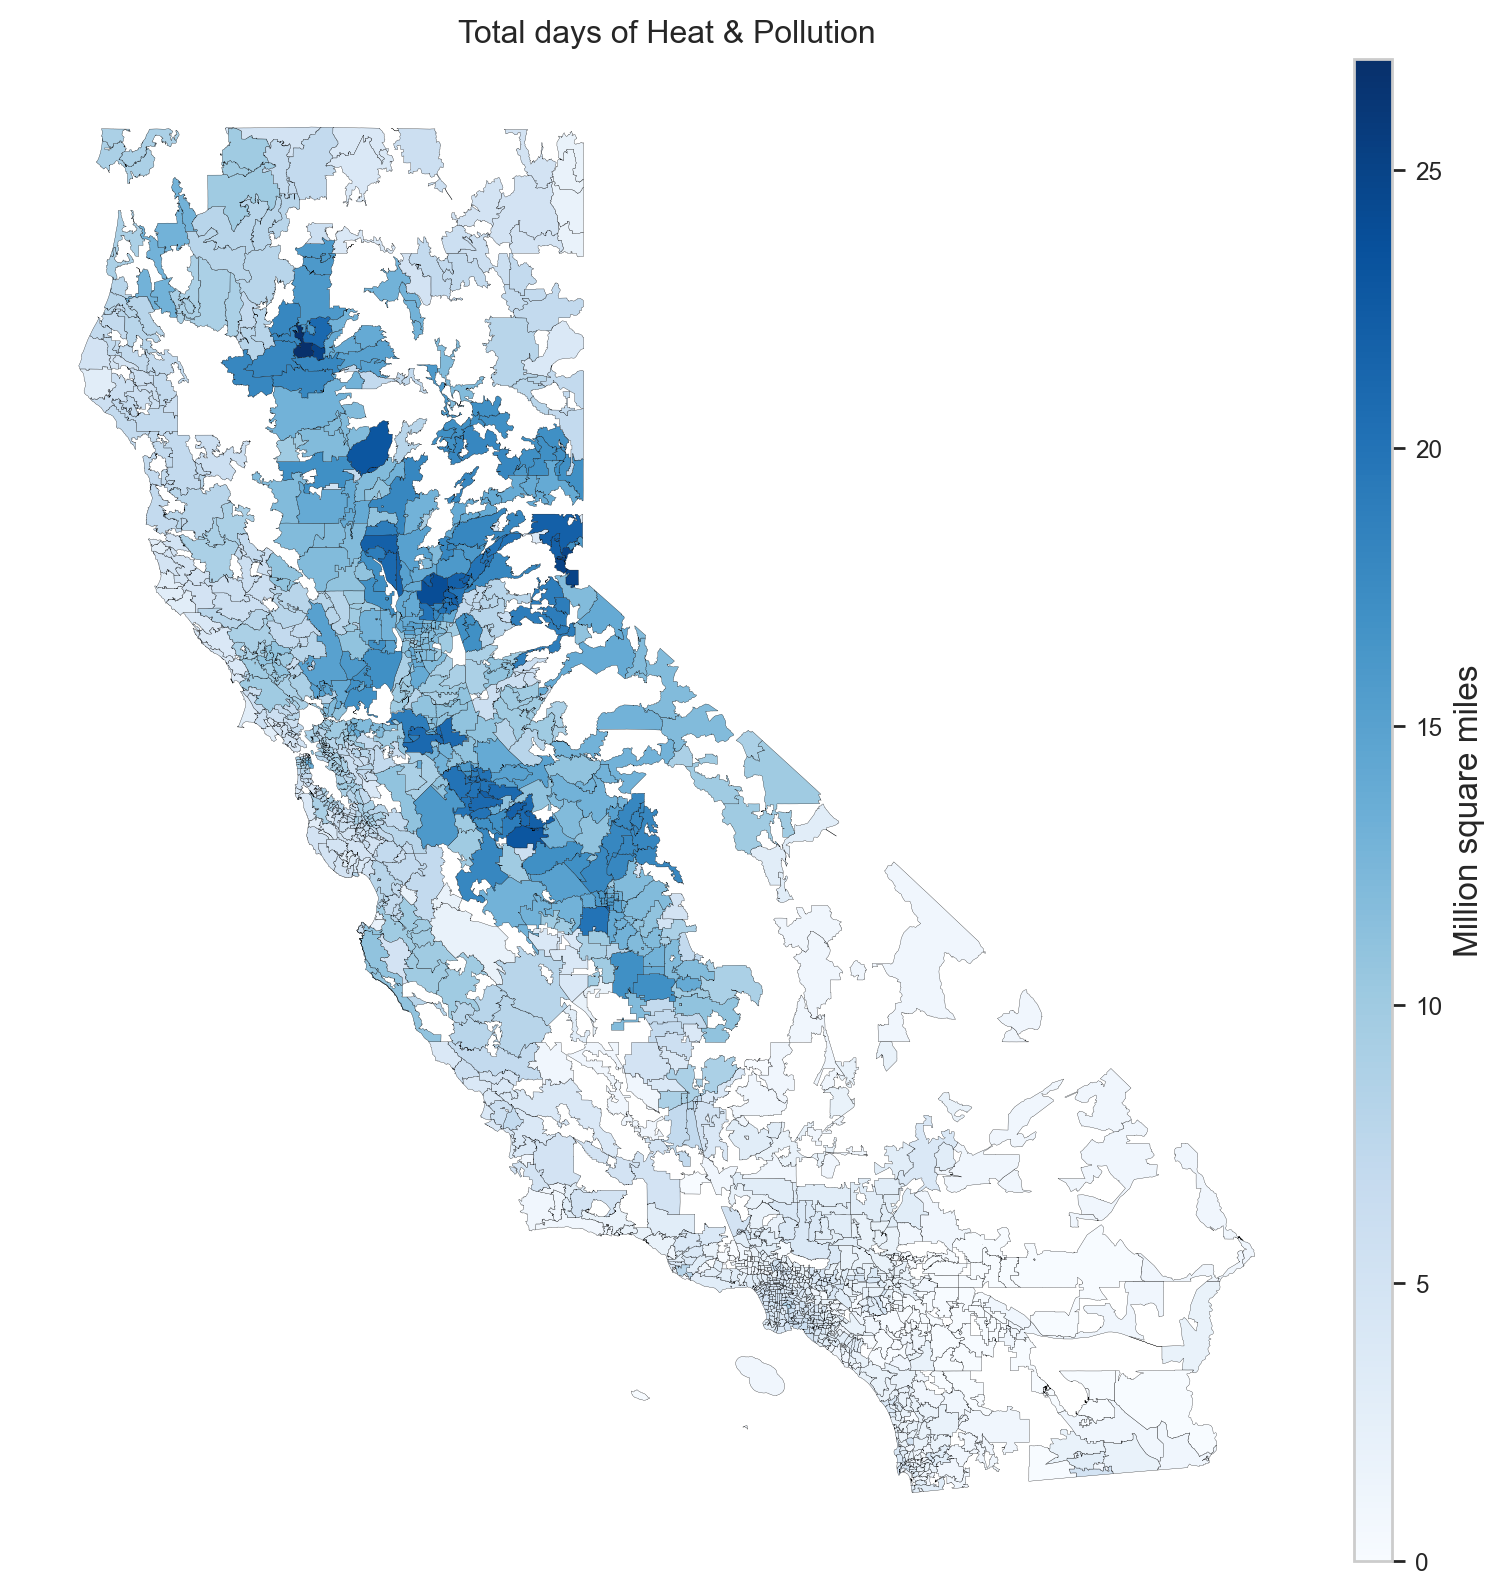

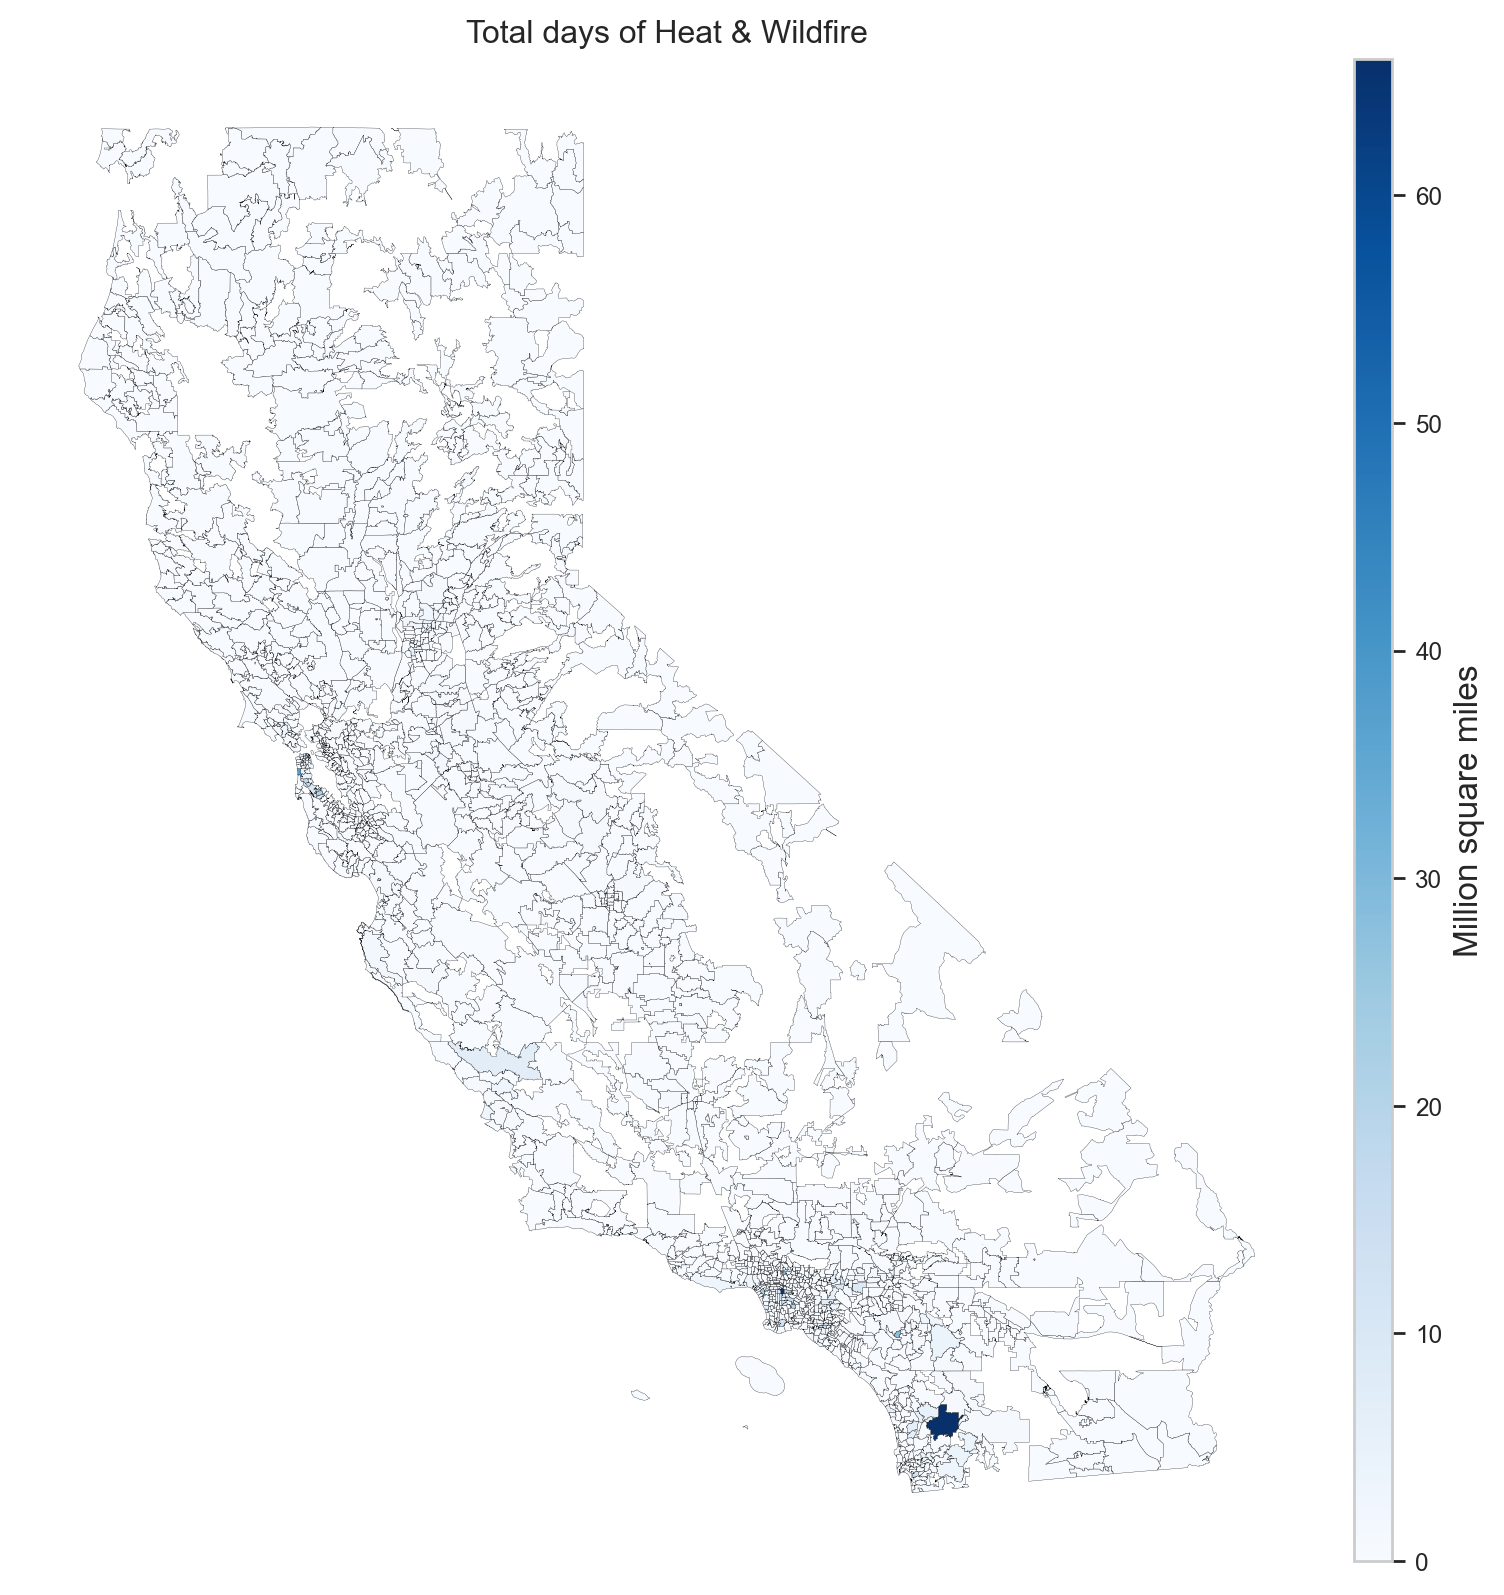

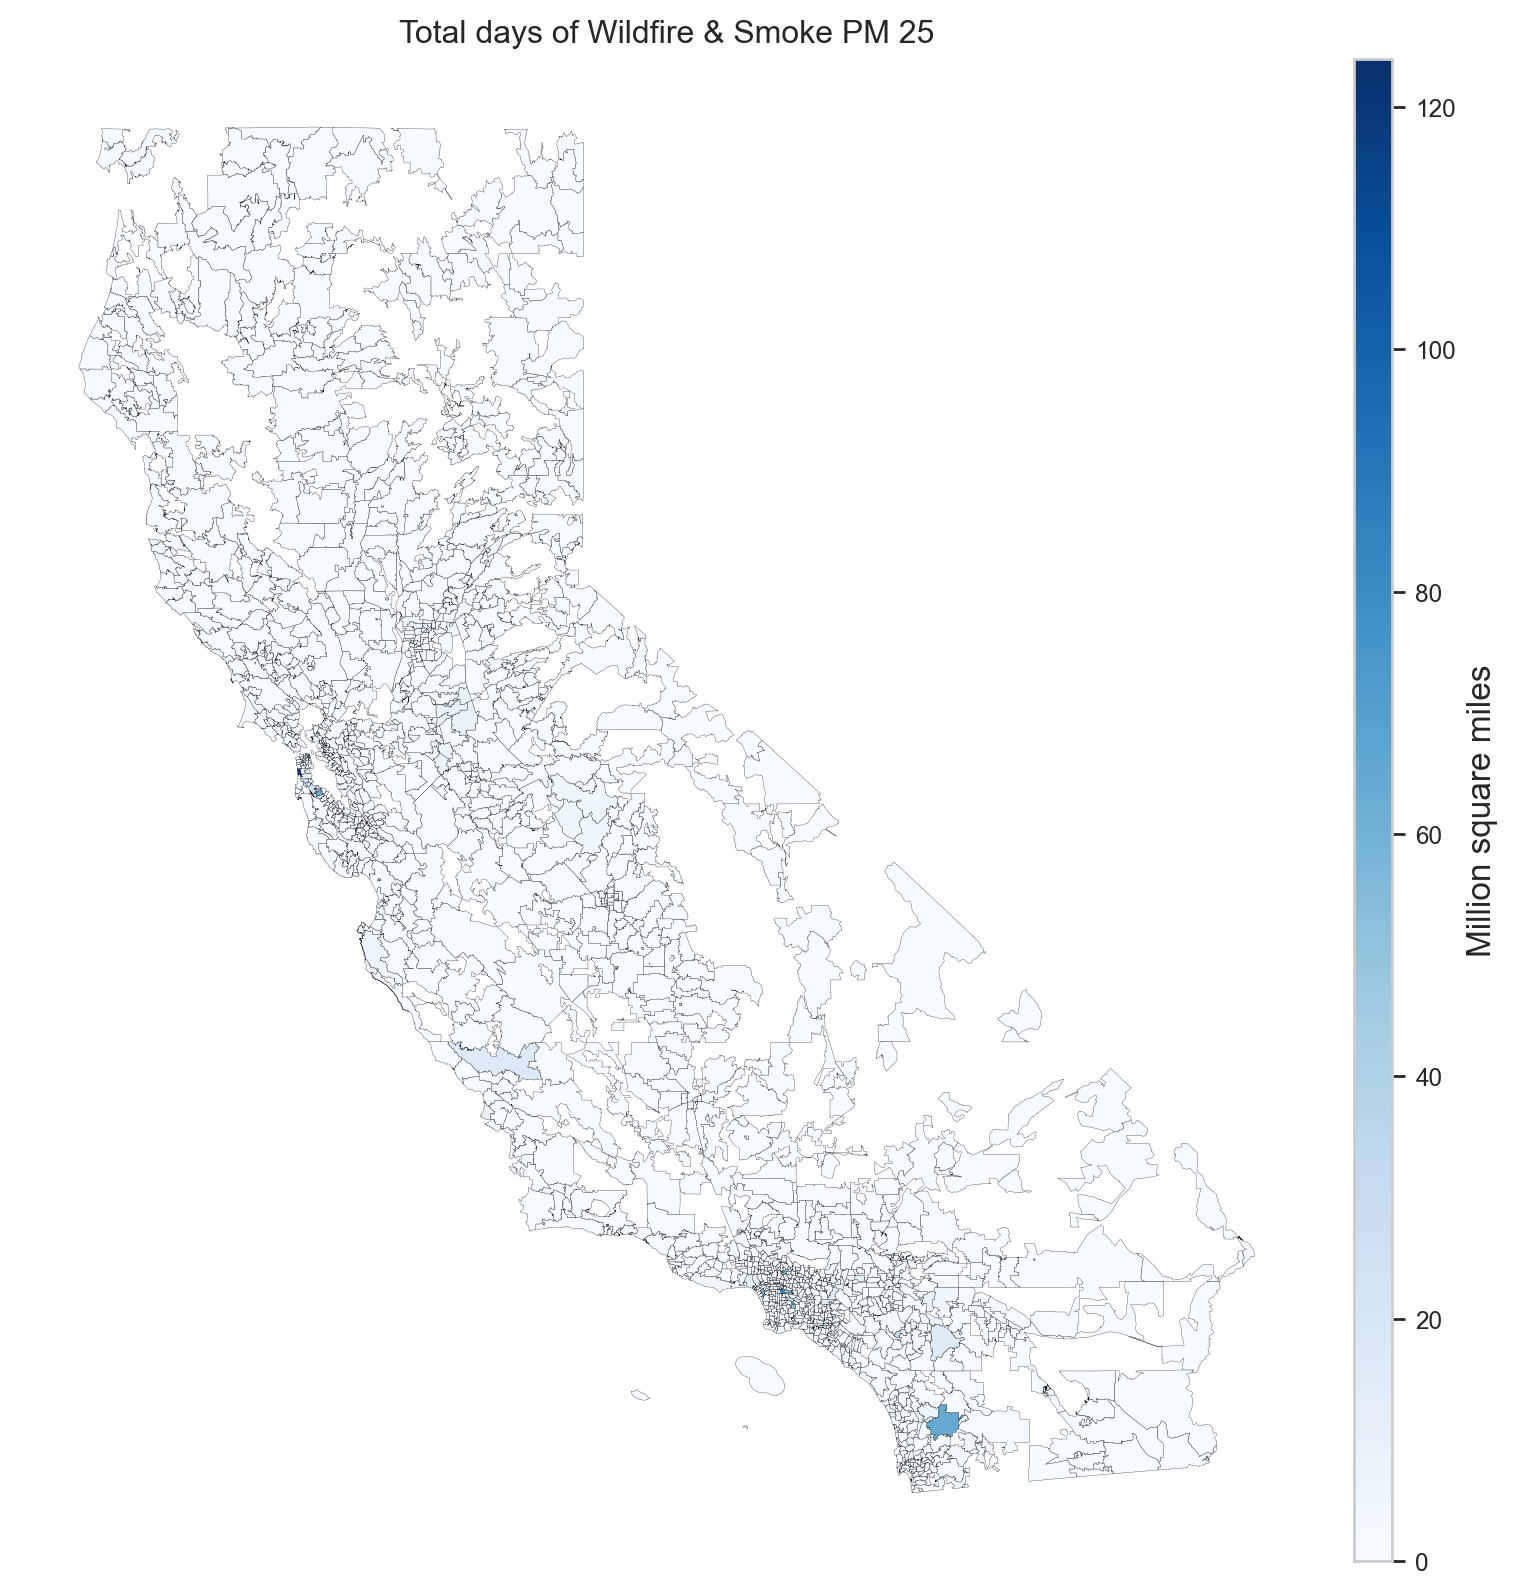

In [153]:
for hs in hss.keys():
    statePlot(hs, hss[hs],'Blues',5,200)

## Get aggregated hotspots

In [204]:
df = pd.read_parquet("outputs/merged_heatday_coldday_wfday_polluted_smoke_polluted.parquet")

In [205]:
df = df[['wfday','heatday', 'coldday','polluted', 'smoke_polluted']]

In [206]:
df = df.reset_index()

In [207]:
df = df.merge(df_, left_on="FIPS", right_on="FIPS.1")

In [208]:
df = df[['time', 'FIPS_x', 'wfday', 'heatday', 'coldday', 'polluted',
       'smoke_polluted', 'ZIP']]

In [209]:
df = df.groupby(by=['time', 'ZIP']).max()

In [210]:
df['ws'] = df['wfday'] & df['smoke_polluted']

df['hw'] = df['wfday'] & df['heatday']

df['hp'] = df['heatday'] & df['polluted']

df['hwp'] = df['heatday'] & df['wfday'] & df['polluted']

df['hws'] = df['heatday'] & df['wfday'] & df['smoke_polluted']

df['hwps'] = df[['heatday','wfday','polluted','smoke_polluted']].sum(axis=1)

In [211]:
df = df.reset_index().groupby('ZIP').sum()

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_36942/384323753.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.reset_index().groupby('ZIP').sum()


In [212]:
df = df.reset_index()
df.ZIP = df.ZIP.astype(str)

In [213]:
df = df.merge(states, left_on="ZIP", right_on="ZCTA5CE20")

In [216]:
df = df.set_geometry(df.geometry)

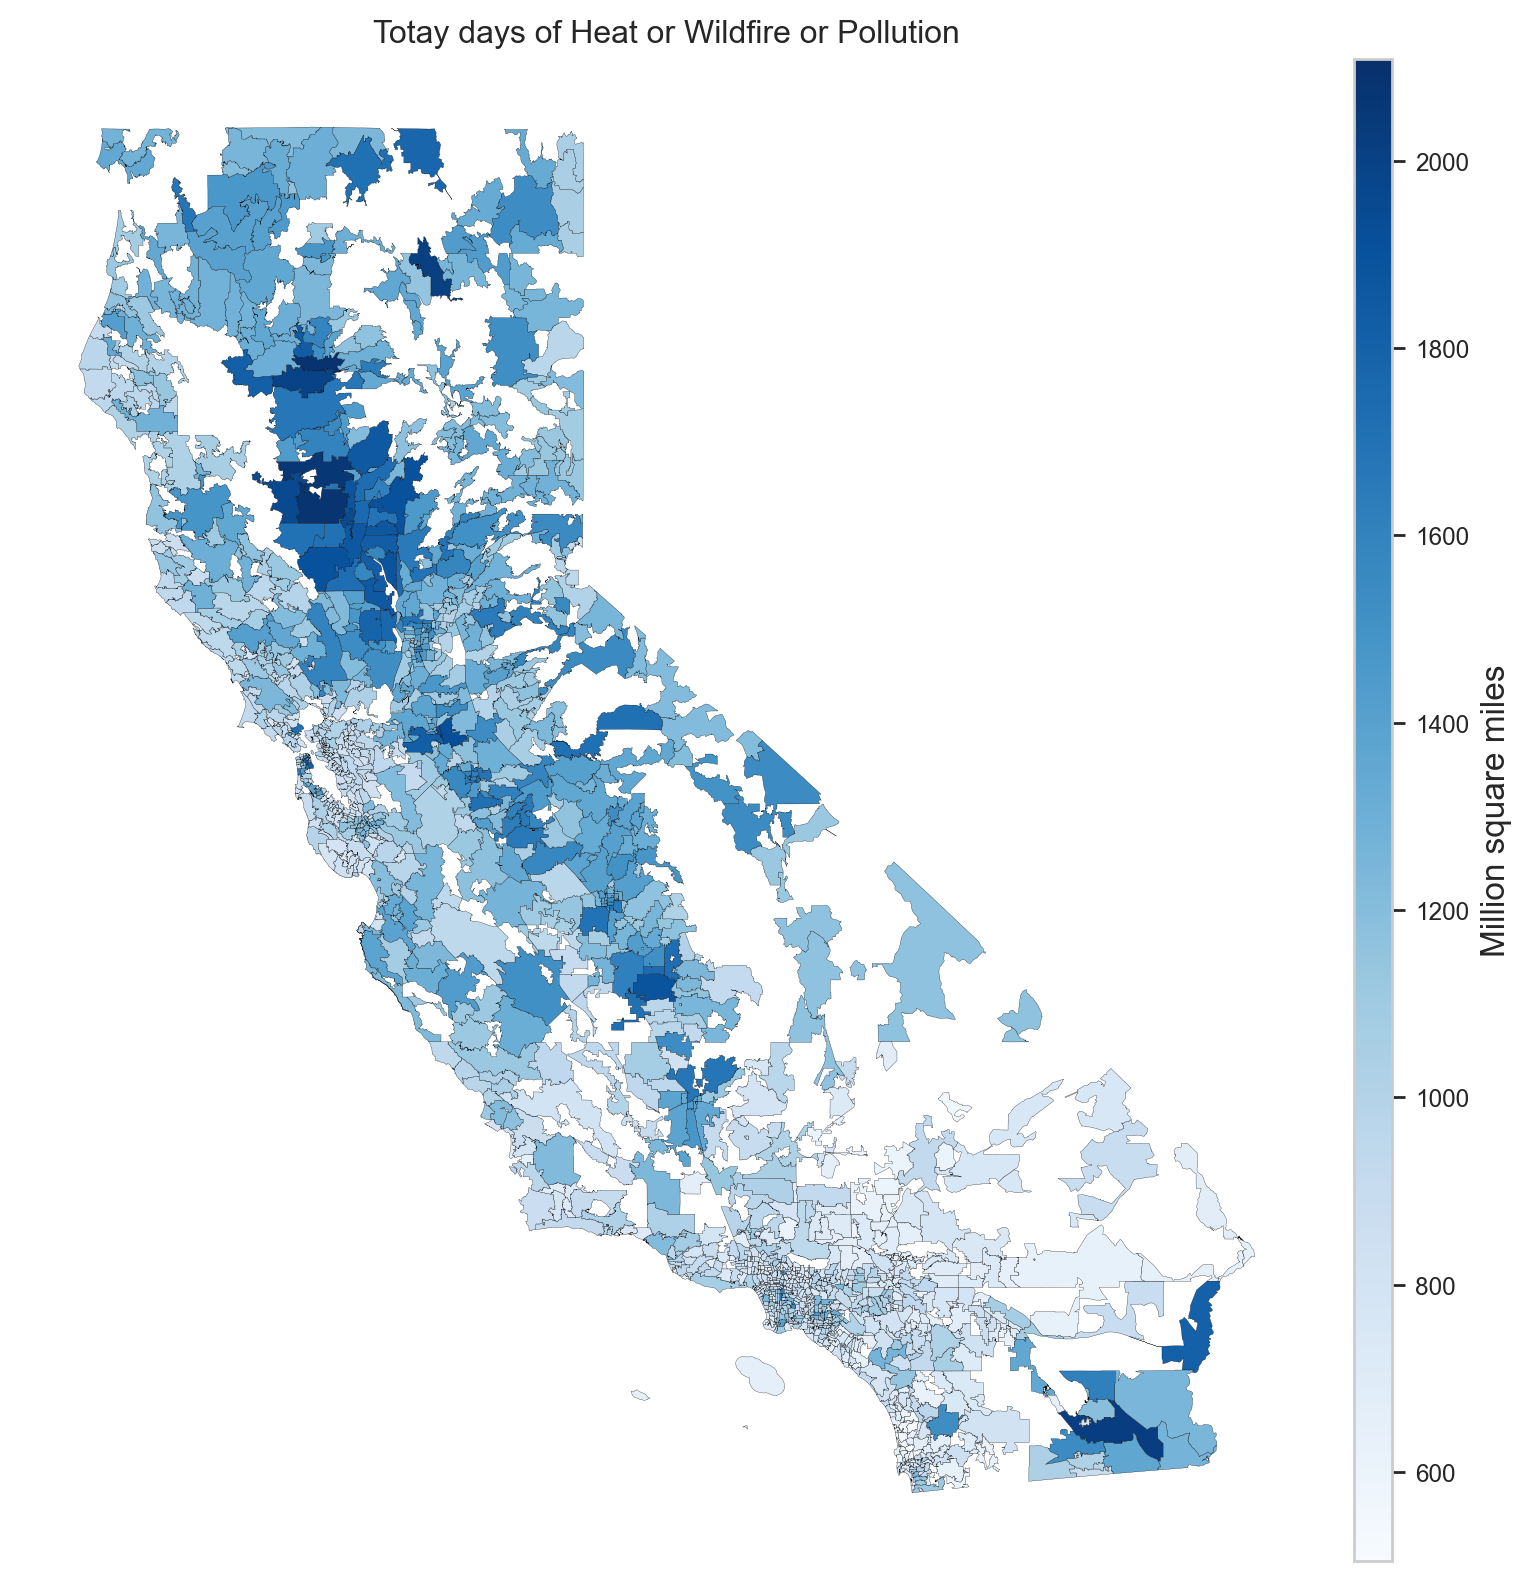

In [220]:
statePlot('hwps', 'Totay days of Heat or Wildfire or Pollution', 'Blues',5,200)

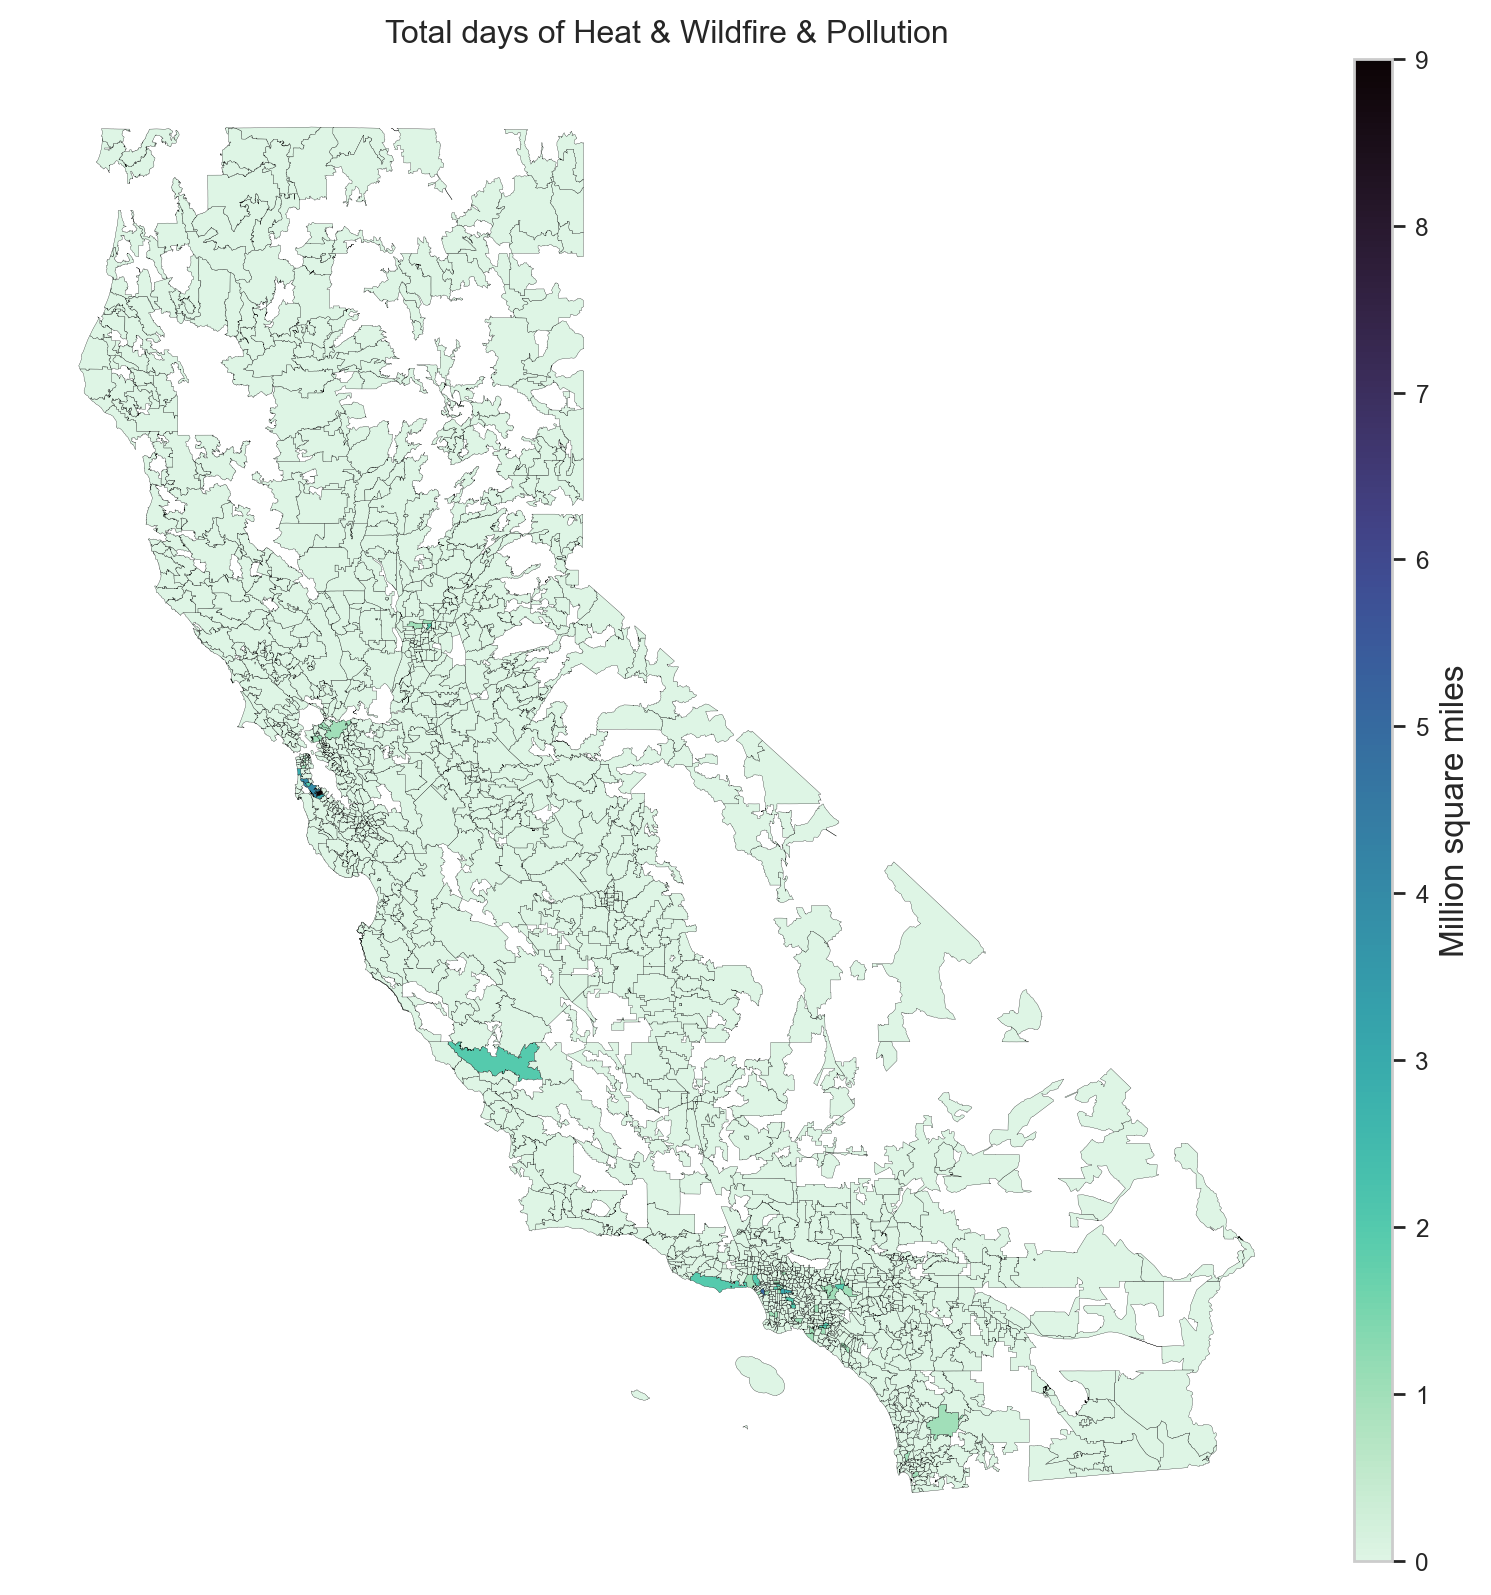

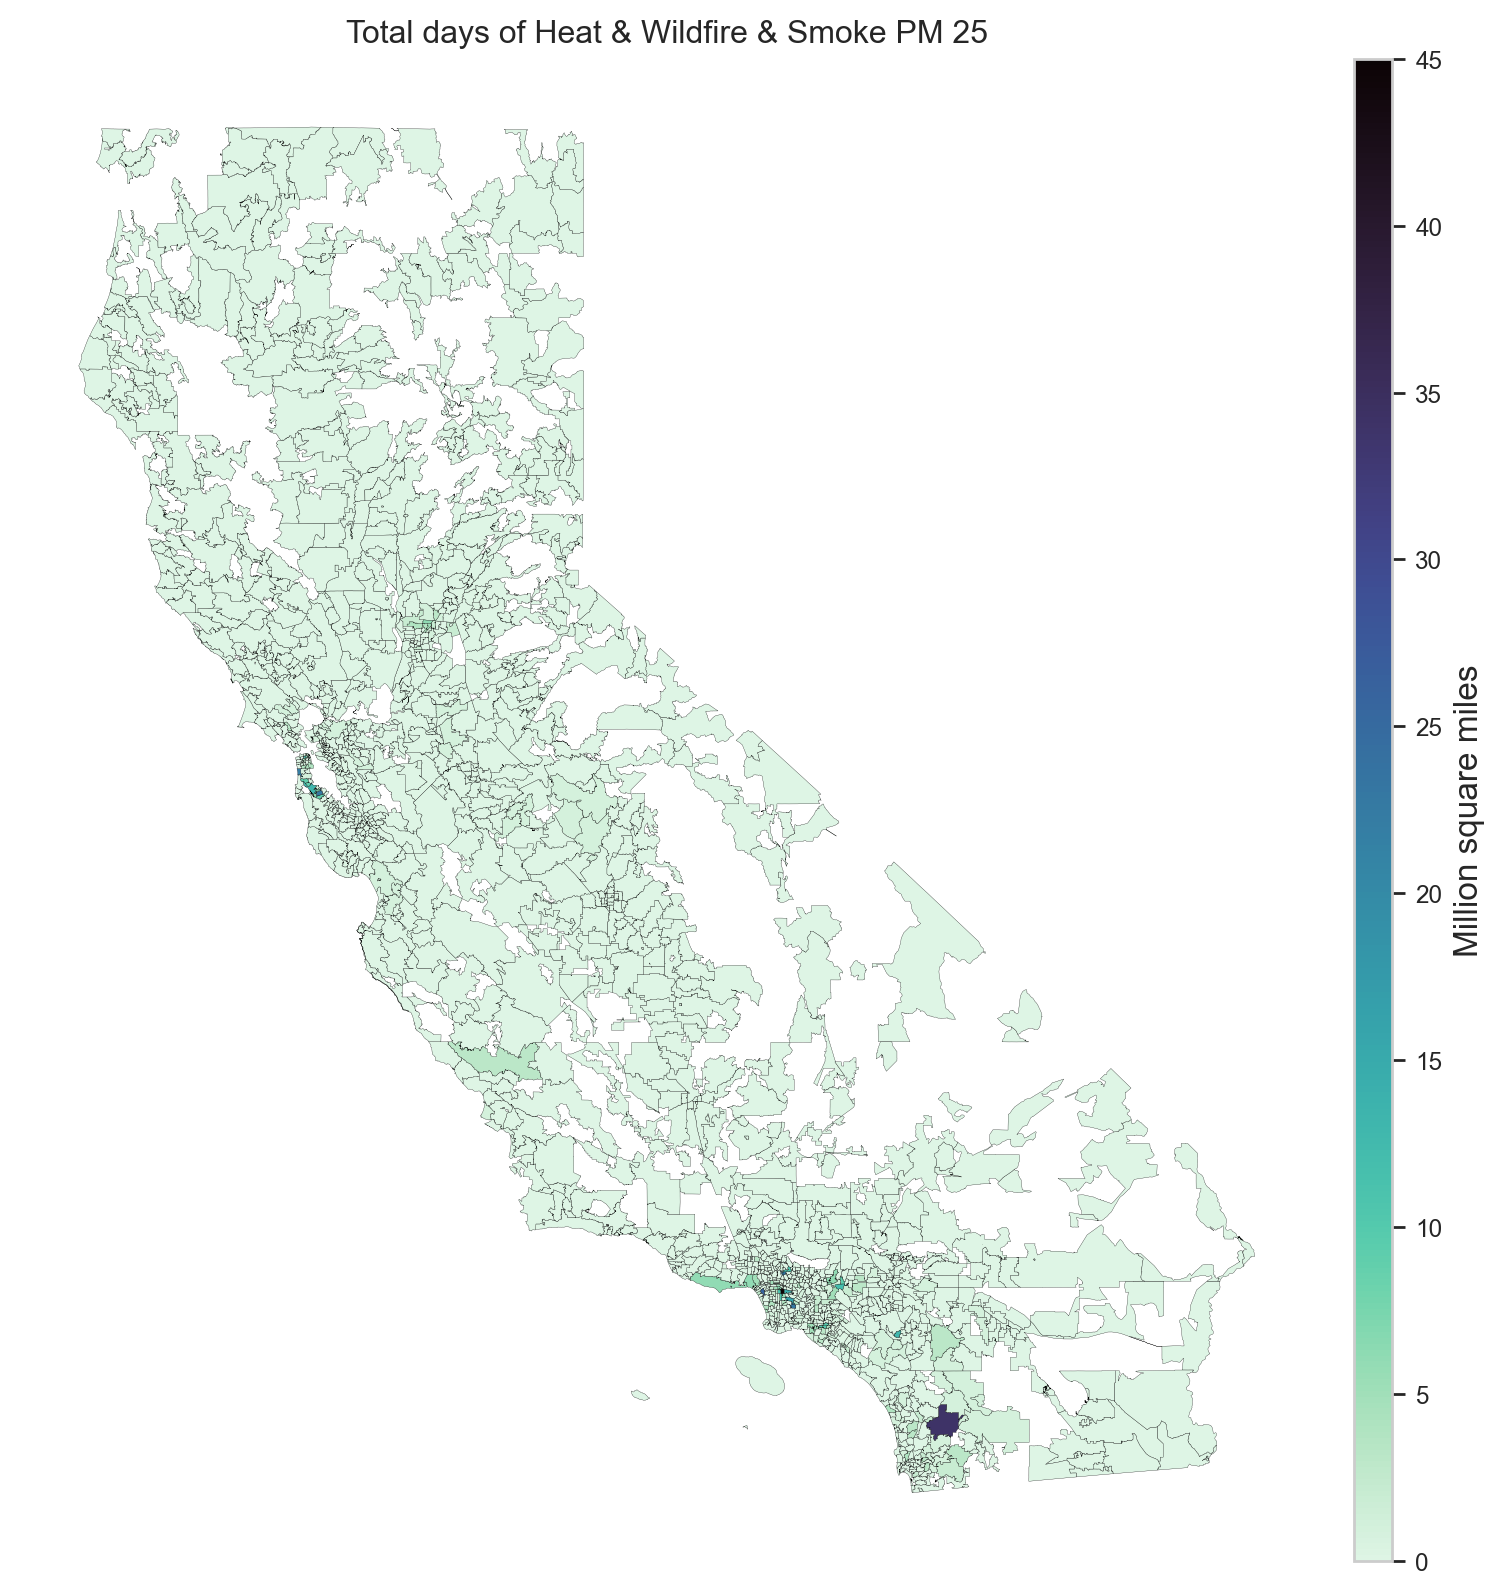

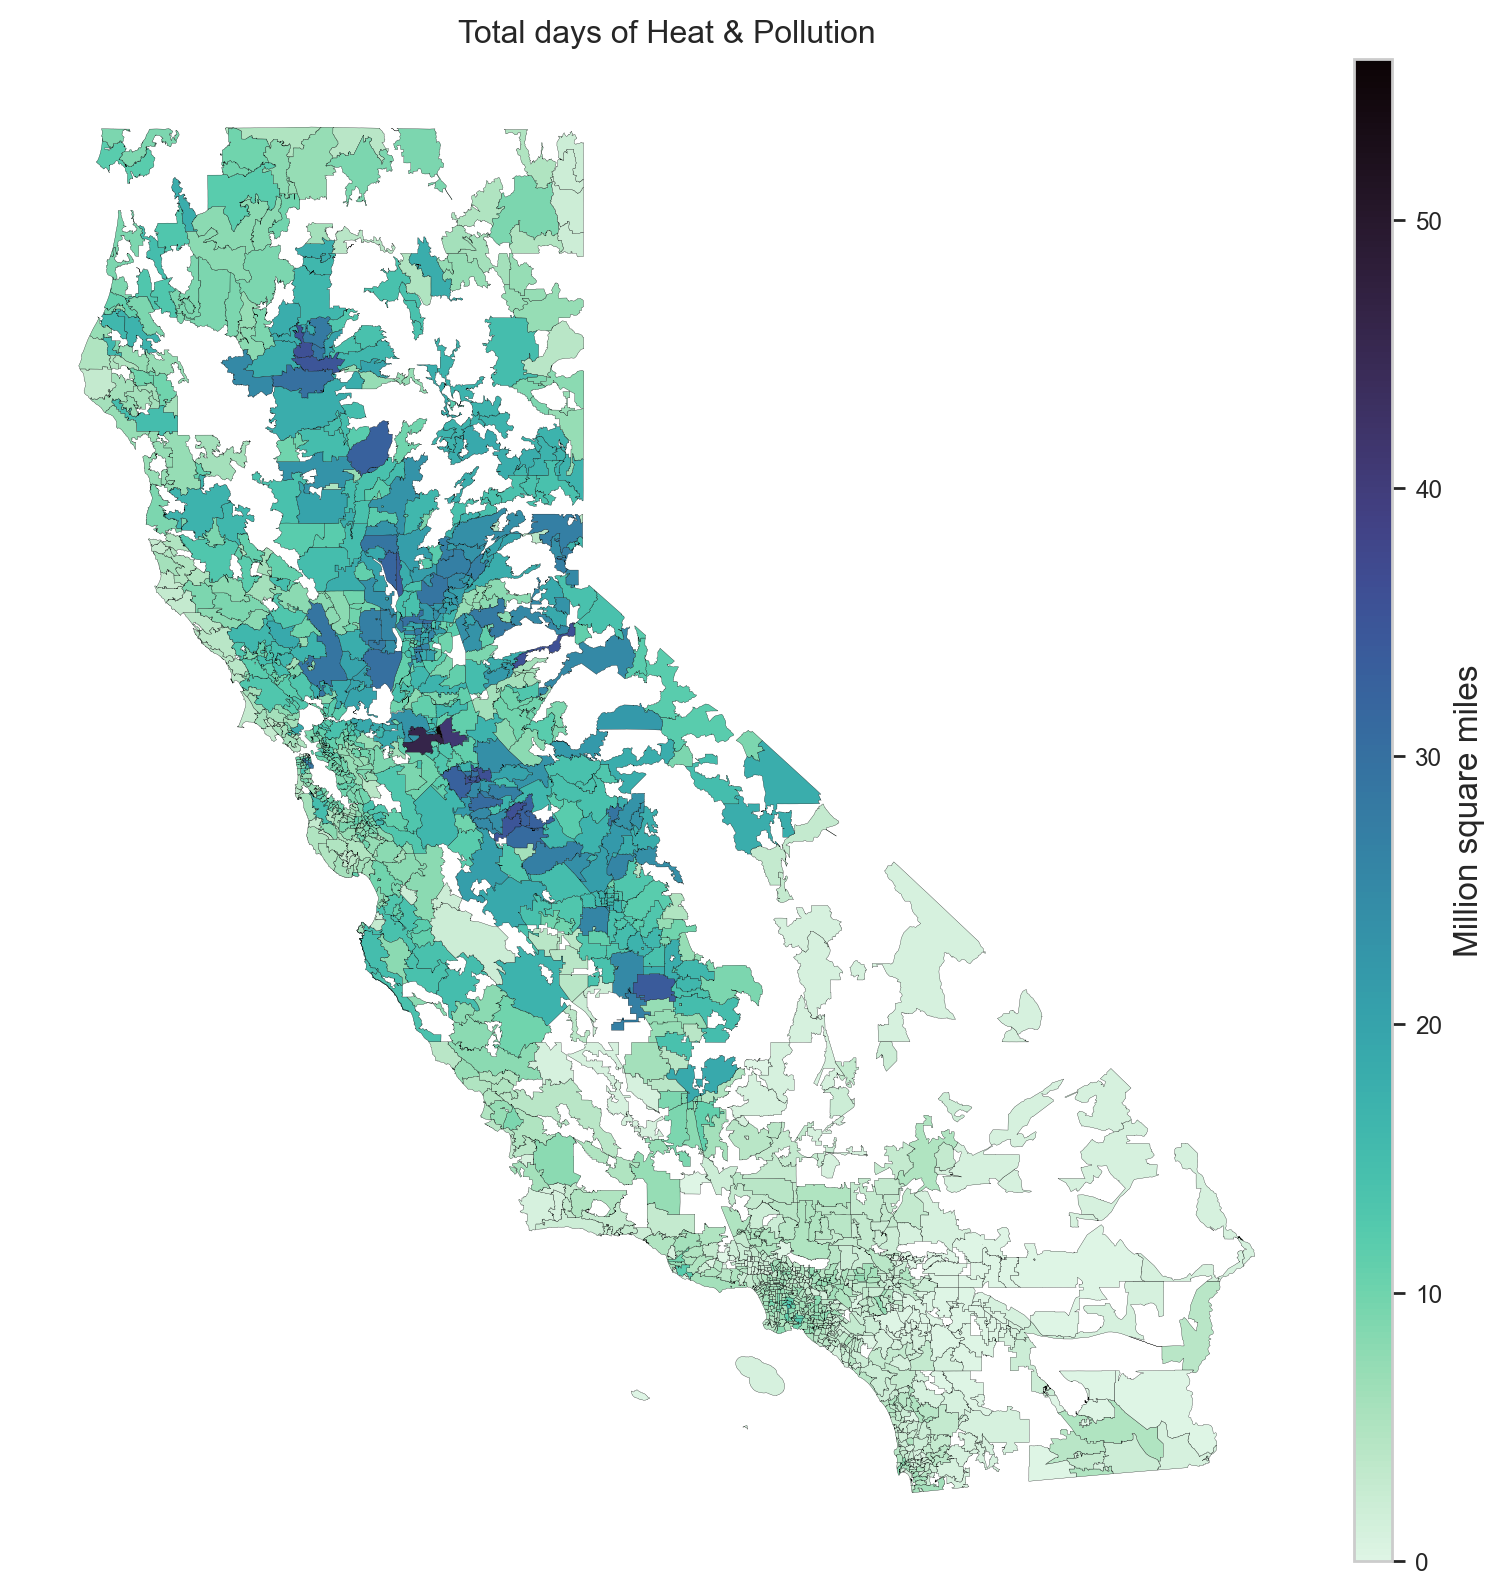

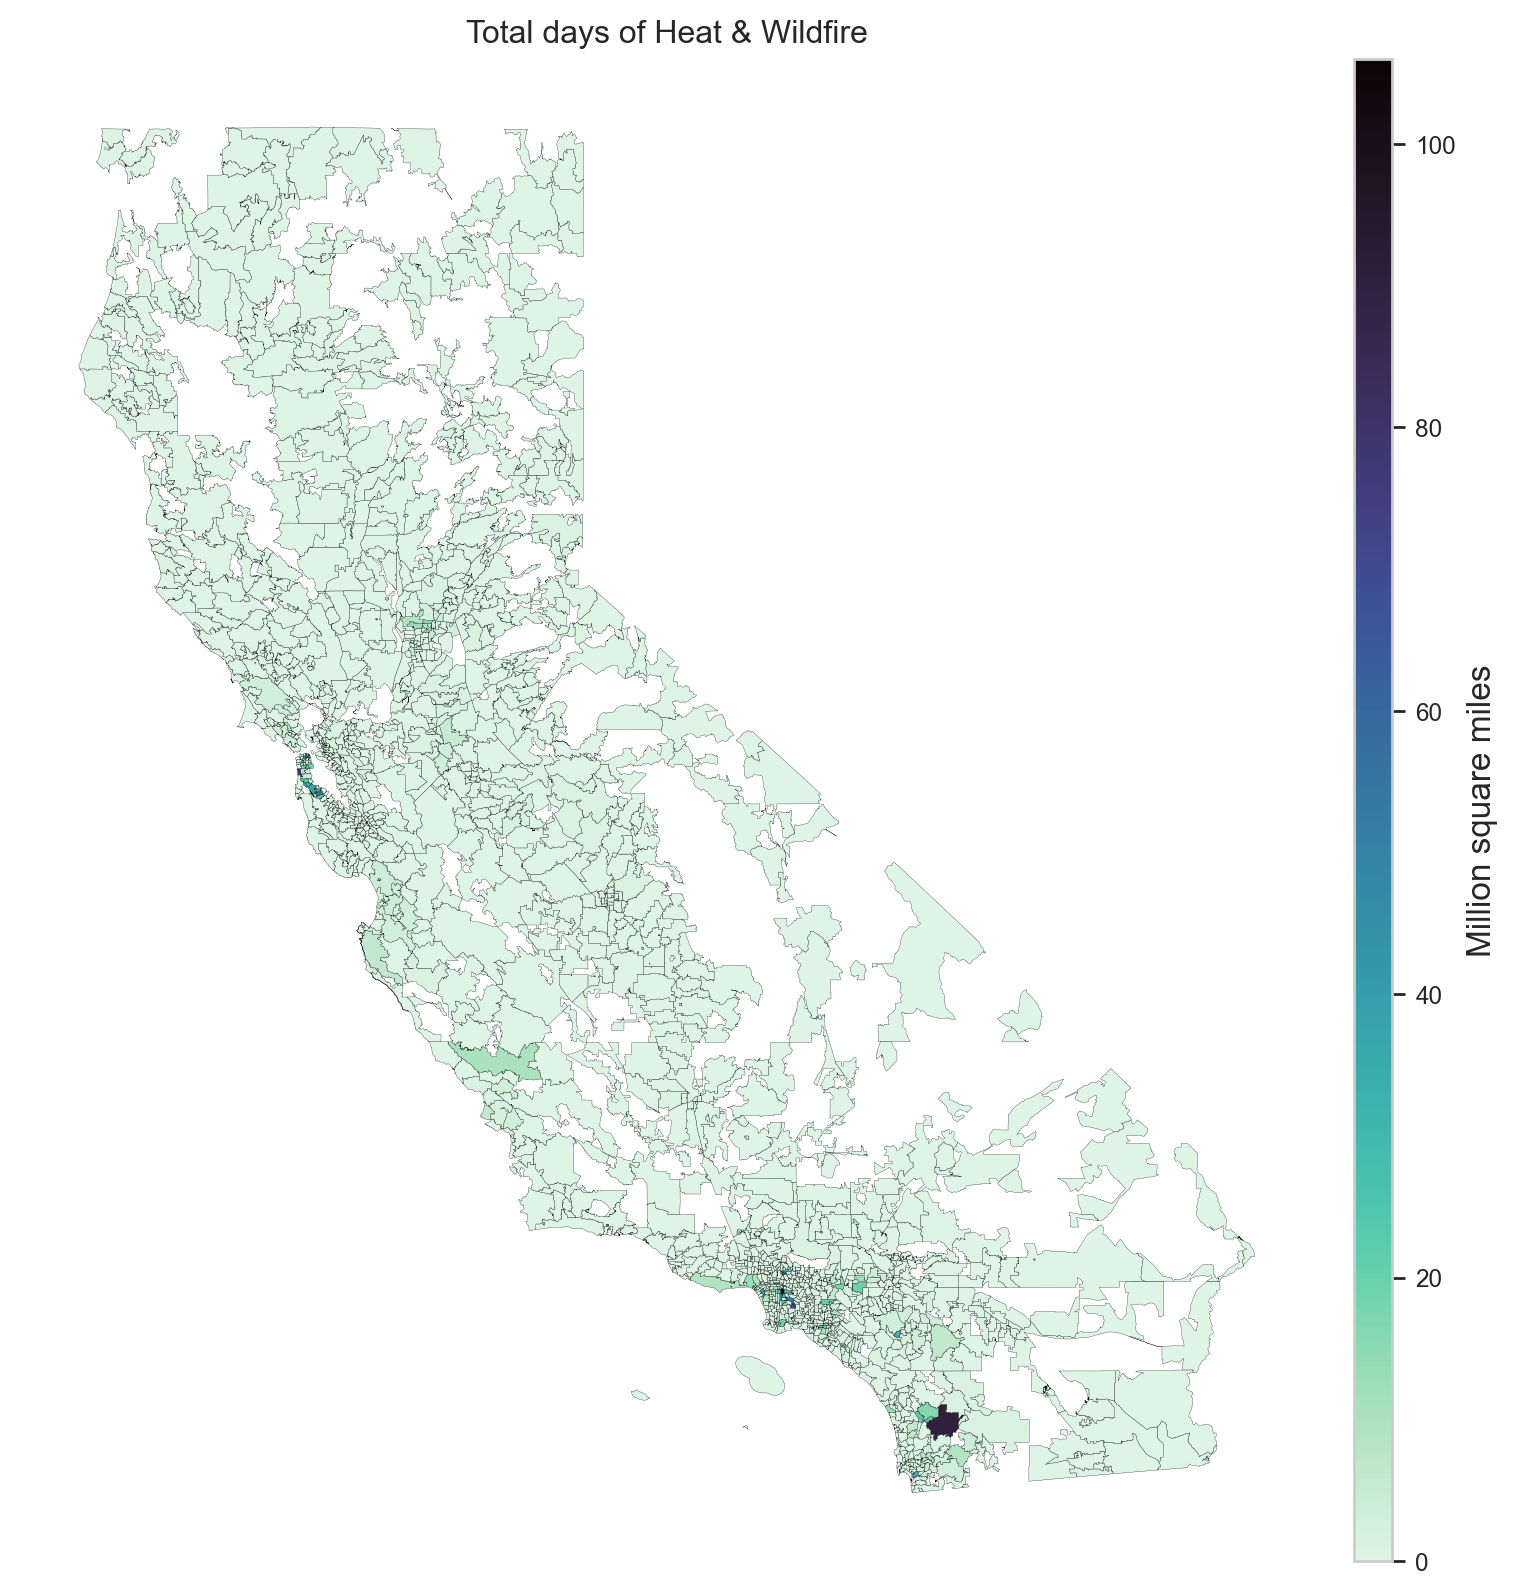

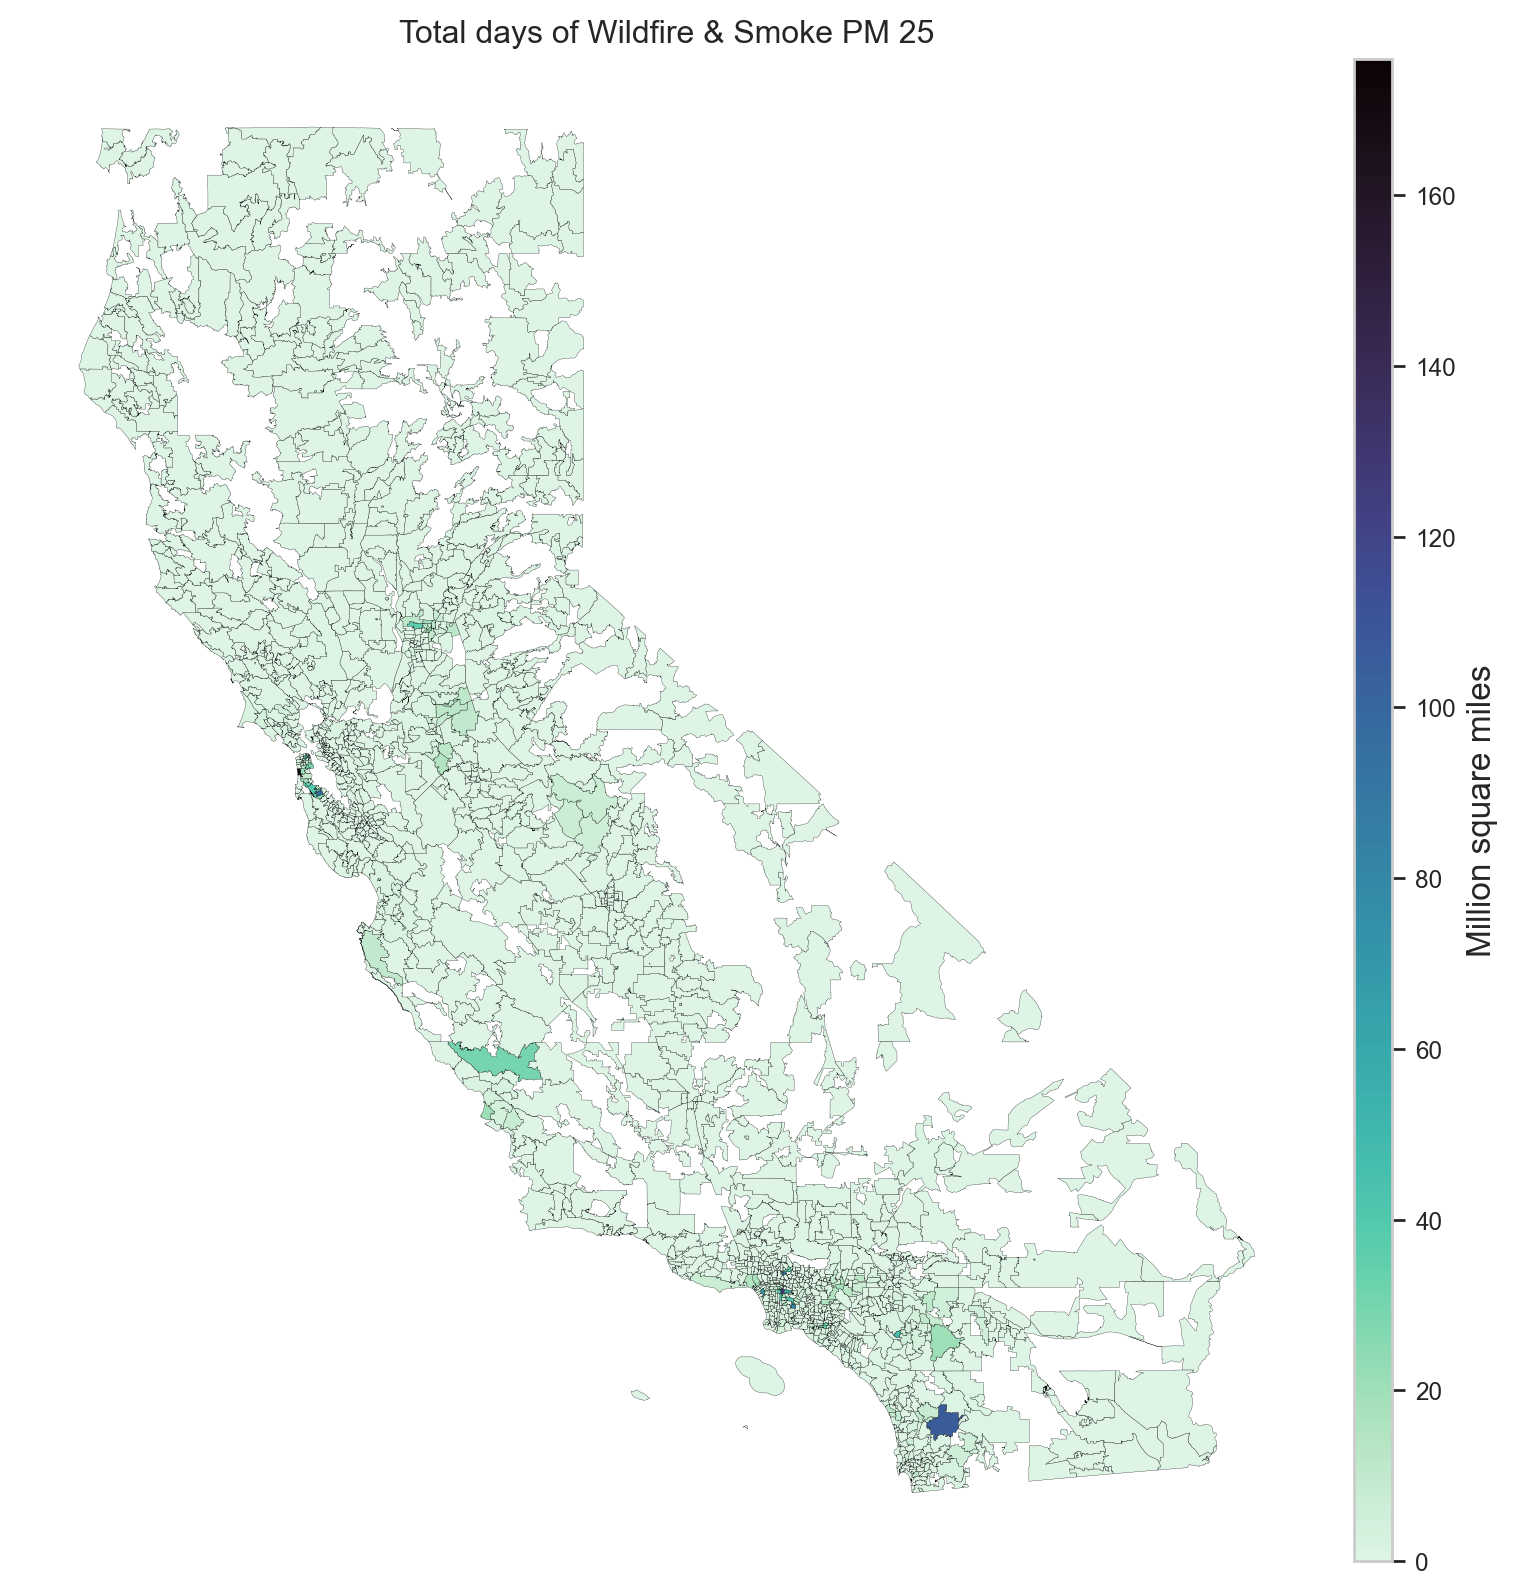

In [221]:
for hs in hss.keys():
    statePlot(hs, hss[hs],'mako_r',5,200)